In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


Load Data

In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')

Visualize

In [3]:
display(df.head())
print(df.shape)

display(test.head())
print(test.shape)

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


(2190, 13)


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


(730, 12)


In [4]:
df.drop(['id'], axis=1, inplace=True)
display(df.head())

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


Check correlations

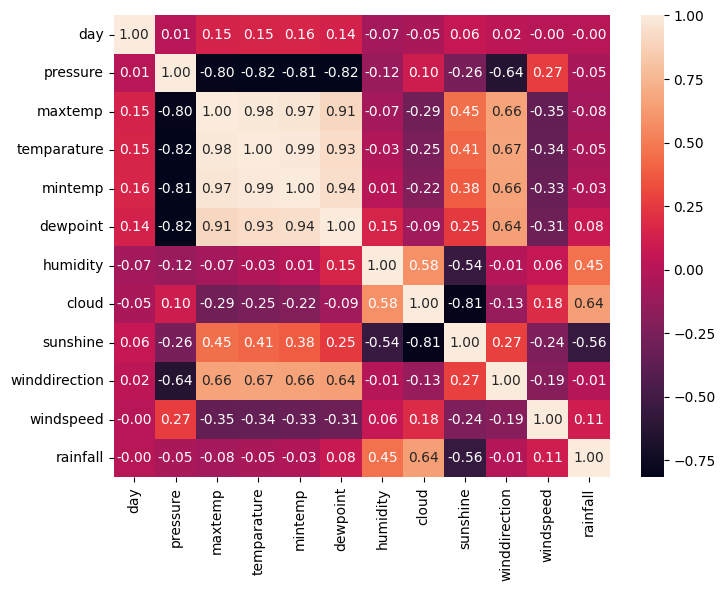

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

In [6]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [7]:
test.drop(['id'], axis=1, inplace=True)
test.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


We want days to represnet a cyclic pattern. Currently, 365 and 1 will be interpreted to be far apart. Thus, we use sine and cosine to transform days into a cyclic feature.

In [8]:
def cyclic_day(df):
    df['day_sin'] = np.sin(360 * df['day'] / 365)
    df['day_cos'] = np.cos(360 * df['day'] / 365)
    return df.drop(['day'], axis=1)

In [9]:
df = cyclic_day(df)
df['winddirection_sin'] = np.sin(df['winddirection'])
df['winddirection_cos'] = np.cos(df['winddirection'])
df.drop(['winddirection'], axis=1, inplace=True)
display(df.head())
test = cyclic_day(test)

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,windspeed,rainfall,day_sin,day_cos,winddirection_sin,winddirection_cos
0,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,17.2,1,0.833991,0.551778,-0.304811,-0.952413
1,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,21.9,1,0.920356,-0.391082,-0.262375,0.964966
2,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,18.1,1,0.181674,-0.983359,0.773891,0.633319
3,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,35.6,1,-0.719868,-0.694110,-0.304811,-0.952413
4,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,24.8,0,-0.976090,0.217369,0.745113,-0.666938


Scale the data

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop(['rainfall'], axis=1))
y = df['rainfall']

In [11]:
print(X.shape)
display(X[:5])

print(y.shape)
display(y[:5])

(2190, 13)


array([[0.51685393, 0.421875  , 0.54771784, 0.61627907, 0.72962963,
        0.81355932, 0.87755102, 0.09090909, 0.2323049 , 0.91699603,
        0.77588997, 0.34789789, 0.02336108],
       [0.5758427 , 0.2265625 , 0.39419087, 0.45736434, 0.58148148,
        0.94915254, 0.90816327, 0.        , 0.31760436, 0.96017865,
        0.30445939, 0.36914175, 0.98440226],
       [0.70505618, 0.3515625 , 0.36099585, 0.41085271, 0.35555556,
        0.61016949, 0.45918367, 0.68595041, 0.24863884, 0.59083738,
        0.00832031, 0.88790868, 0.81817208],
       [0.40449438, 0.30078125, 0.43153527, 0.5       , 0.63333333,
        0.94915254, 0.94897959, 0.        , 0.56624319, 0.14006579,
        0.15294469, 0.34789789, 0.02336108],
       [0.64044944, 0.42578125, 0.45643154, 0.43410853, 0.36666667,
        0.22033898, 0.43877551, 0.29752066, 0.37023593, 0.01195515,
        0.60868493, 0.8735023 , 0.16644868]])

(2190,)


0    1
1    1
2    1
3    1
4    0
Name: rainfall, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
print(X_train.shape)

(1533, 13)


In [14]:
import tensorflow as tf

First, let's try a standard feed-forward neural network

In [15]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),

        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu'),
        
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64, activation='relu'),
        
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(32, activation='relu'),
        
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
    )
    
    return model

In [16]:
model1 = create_model()

history = model1.fit(
    X_train, y_train, 
    validation_split=0.2, 
    epochs=25, 
    batch_size=16
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5323 - loss: 0.8254 - val_accuracy: 0.7362 - val_loss: 0.5675
Epoch 2/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8031 - loss: 0.4674 - val_accuracy: 0.7557 - val_loss: 0.4929
Epoch 3/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8193 - loss: 0.4420 - val_accuracy: 0.7980 - val_loss: 0.4445
Epoch 4/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8681 - loss: 0.3793 - val_accuracy: 0.8339 - val_loss: 0.4040
Epoch 5/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8419 - loss: 0.3845 - val_accuracy: 0.8404 - val_loss: 0.3880
Epoch 6/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8556 - loss: 0.3561 - val_accuracy: 0.8404 - val_loss: 0.3953
Epoch 7/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8252 - loss: 0.4044 - val_accuracy: 0.8404 - val_loss: 0.3957
Epoch 8/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8501 - loss: 0.3689 - val_accuracy: 0.8502 - val_loss:

In [17]:
test_loss, test_accuracy = model1.evaluate(X_test, y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8603 - loss: 0.3820 


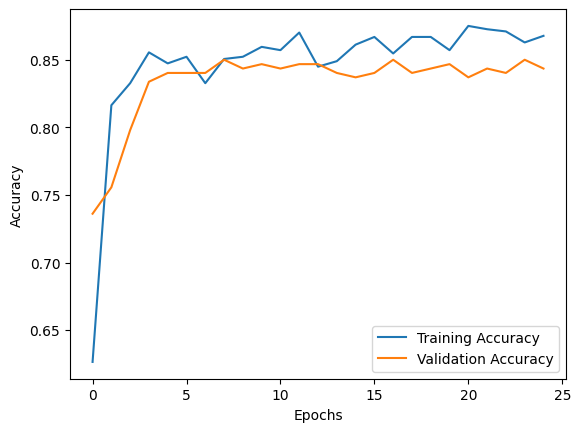

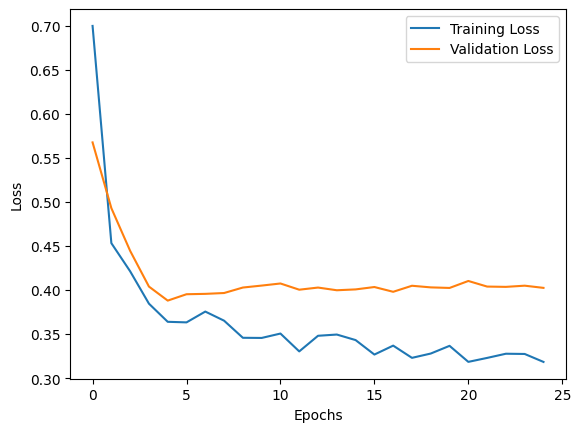

In [18]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Let's see how a random forest performs

In [19]:
print(X_train.shape)

(1533, 13)


In [20]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=200, random_state=0)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [21]:
from sklearn.metrics import f1_score, accuracy_score

accuracy = model2.score(X_test, y_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'accuracy: {accuracy}\nf1 score: {f1}')

accuracy: 0.8599695585996956
f1 score: 0.8551398218408718


Now, let's try including a 1D Convolutional layer to capture the sequential patterns

In [22]:
import tensorflow as tf

def create_1dconv_model():
    model = tf.keras.Sequential([

        tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling1D(pool_size=2),

        tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Flatten(),
        # tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        # tf.keras.layers.Dropout(0.5),
        
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        # tf.keras.layers.Dropout(0.5),

        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        
        # Output Layer
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [23]:
def reshape_temporal(X_train, y_train, time_steps):
    y_train = np.array(y_train)
    
    X_new = []
    y_new = []
    for i in range(time_steps, len(X_train)):
        X_new.append(X_train[i-time_steps:i])
        y_new.append(y_train[i])
    return np.array(X_new), np.array(y_new)

In [24]:
modelC = create_1dconv_model()
X_train, y_train = reshape_temporal(X_train, y_train, 3)
print(X_train.shape)

(1530, 3, 13)


In [25]:
history = modelC.fit(
    X_train, y_train,
    validation_split=0.2, 
    epochs=50, 
    batch_size=16
)

Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5267 - loss: 0.8503 - val_accuracy: 0.7353 - val_loss: 0.5836
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7010 - loss: 0.5733 - val_accuracy: 0.7353 - val_loss: 0.5796
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7442 - loss: 0.5281 - val_accuracy: 0.7353 - val_loss: 0.6151
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7626 - loss: 0.5132 - val_accuracy: 0.7353 - val_loss: 0.6142
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7806 - loss: 0.4686 - val_accuracy: 0.7353 - val_loss: 0.6443
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8081 - loss: 0.4493 - val_accuracy: 0.7386 - val_loss: 0.6315
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7876 - loss: 0.4690 - val_accuracy: 0.6634 - val_loss: 0.7280
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8078 - loss: 0.4086 - val_accuracy: 0.7026 - val_loss:

In [26]:
X_test, y_test = reshape_temporal(X_test, y_test, 3)

In [27]:
test_loss, test_accuracy = modelC.evaluate(X_test, y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5725 - loss: 1.4154 


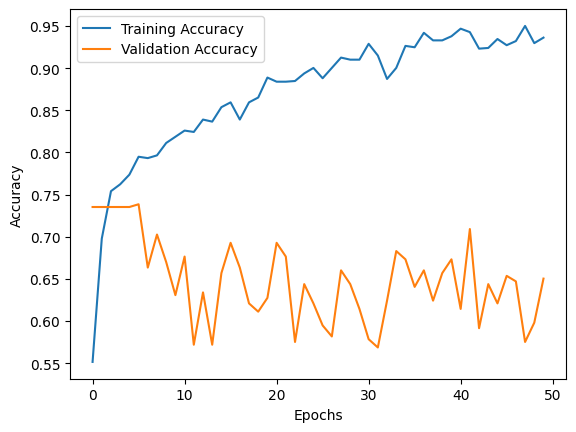

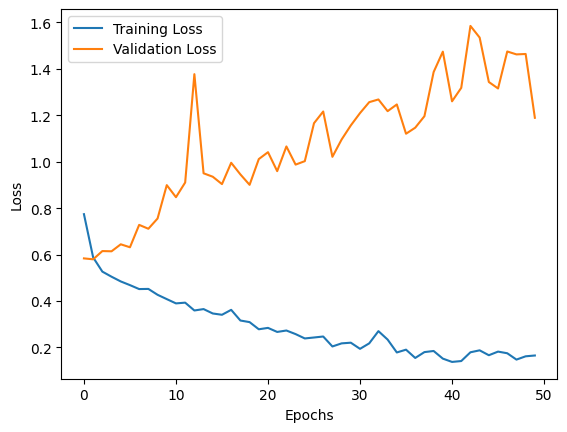

In [28]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()